In [1]:
#%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 


import numpy as npy

import pandas as pd

In [2]:
### 3CT 1 job
fpath = '~/Documents/5GReasoner/Quark/quarkExperiments/merge-experiments/src/data/'
jobType="1 Job"

fname_m1_p1_latency=fpath +'master_latency_1636479406.csv'
fname_m1_p1_staleness=fpath + 'master_staleness_1636479685.csv'
fname_m2_p1_latency=fpath +'B_latency_1636479406.csv'
fname_m2_p1_staleness=fpath +'B_staleness_1636510359.csv'
fname_m3_p1_latency=fpath +'C_latency_1636479406.csv'
fname_m3_p1_staleness=fpath +'C_staleness_1636510380.csv'
#fnameRANDNHOP=fpath + 'Jan5D_06_RandPlacement-heft-10-10.csv'


  

dfm1p1lat = pd.read_csv(fname_m1_p1_latency, header=None)
dfm1p1stal= pd.read_csv(fname_m1_p1_staleness, header=None)

dfm2p1lat= pd.read_csv(fname_m2_p1_latency, header=None)
dfm2p1stal= pd.read_csv(fname_m2_p1_staleness, header=None)

dfm3p1lat= pd.read_csv(fname_m3_p1_latency, header=None)
dfm3p1stal=pd.read_csv(fname_m3_p1_staleness, header=None)

In [3]:
def modify_df(df0, params):
    df0 = df0.applymap(lambda x:  npy.float64(x[:-1]) )
    df = df0.copy()
    # params = {"expName": <date-numBranches-numRounds-Port>, machineName=<m1>, processName=<p1>, metricName=<latency>}
    df.columns = ['values']
    df["Experiment"] = params["expName"]
    df["uniqueID"] = params["machineName"] + "-" + params["processName"]
    df["Machine"] =  params["machineName"]
    df["ProcessID"] = params["processName"]
    df["MetricType"] = params["metricName"]
    df["timestamp"] = params["timestamp"]
    df["numBranches"] = params["numBranches"]
    df["numRounds"] = params["numRounds"]
    df["port"] = params["port"]
    return df


In [4]:
x="1224234s"
npy.float(x[:-1])

1224234.0

In [5]:
def deleteFirstFewRows_df(df0, numRows):
    df = df0.copy()
    df = df.iloc[numRows:]
    # df=df.tail(-3)
    return df



In [6]:
staleFrames = [dfm1p1stal, dfm2p1stal, dfm3p1stal]
stales = []
for d in staleFrames:
    d = deleteFirstFewRows_df(d, 10)
    d = d.applymap(lambda x:  npy.float64(x[:-1]) )
    stales.append(d)
    

In [7]:
params = {"expName": "trial01", "machineName": "m1", "processName": "master", "metricName": "latency", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm1p1lat_mod1 = modify_df(dfm1p1lat, params)

params = {"expName": "trial01", "machineName": "m2", "processName": "p1", "metricName": "latency", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm2p1lat_mod1 = modify_df(dfm2p1lat, params)

params = {"expName": "trial01", "machineName": "m3", "processName": "p1", "metricName": "latency", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm3p1lat_mod1 = modify_df(dfm3p1lat, params)

lat_frames = [dfm1p1lat_mod1, dfm2p1lat_mod1, dfm3p1lat_mod1]
DF_LAT = pd.concat(lat_frames)
DF_LAT.head()

,values,Experiment,uniqueID,Machine,ProcessID,MetricType,timestamp,numBranches,numRounds,port
0,0.044812,trial01,m1-master,m1,master,latency,1636479406,3,50,8080
1,0.081214,trial01,m1-master,m1,master,latency,1636479406,3,50,8080
2,0.065962,trial01,m1-master,m1,master,latency,1636479406,3,50,8080
3,0.069940,trial01,m1-master,m1,master,latency,1636479406,3,50,8080
4,0.051586,trial01,m1-master,m1,master,latency,1636479406,3,50,8080


In [8]:
params = {"expName": "trial01", "machineName": "m1", "processName": "master", "metricName": "staleness", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm1p1stal_mod1 = modify_df(dfm1p1stal, params)
dfm1p1stal_mod1 = deleteFirstFewRows_df( dfm1p1stal_mod1, 10)

params = {"expName": "trial01", "machineName": "m2", "processName": "p1", "metricName": "staleness", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm2p1stal_mod1 = modify_df(dfm2p1stal, params)
dfm2p1stal_mod1 = deleteFirstFewRows_df( dfm2p1stal_mod1, 10)

params = {"expName": "trial01", "machineName": "m3", "processName": "p1", "metricName": "staleness", "timestamp":1636479406, "numBranches": 3, "numRounds":50, "port":8080}
dfm3p1stal_mod1 = modify_df(dfm3p1stal, params)
dfm3p1stal_mod1 = deleteFirstFewRows_df( dfm3p1stal_mod1, 10)

stale_frames = [dfm1p1stal_mod1, dfm2p1stal_mod1, dfm3p1stal_mod1]
DF_STALE = pd.concat(stale_frames)
DF_STALE.head()

,values,Experiment,uniqueID,Machine,ProcessID,MetricType,timestamp,numBranches,numRounds,port
10,1.06,trial01,m1-master,m1,master,staleness,1636479406,3,50,8080
11,2.12,trial01,m1-master,m1,master,staleness,1636479406,3,50,8080
12,1.50,trial01,m1-master,m1,master,staleness,1636479406,3,50,8080
13,0.69,trial01,m1-master,m1,master,staleness,1636479406,3,50,8080
14,0.35,trial01,m1-master,m1,master,staleness,1636479406,3,50,8080


In [9]:
latFrames = [dfm1p1lat, dfm2p1lat, dfm3p1lat]
latency = []
for d in latFrames:
    d = d.applymap(lambda x:  npy.float64(x[:-1]) )
    latency.append(d)

DF0_LAT = pd.concat(latency)
DF0_LAT.head()

,0
0,0.044812
1,0.081214
2,0.065962
3,0.069940
4,0.051586


In [10]:

DF0_STALE = pd.concat(stales)
DF0_STALE.head()

,0
10,1.06
11,2.12
12,1.50
13,0.69
14,0.35


In [12]:
DF1_LAT = pd.concat(latency,axis=1)
DF1_LAT.columns = ["m1-p1", "m2-p1", "m3-p1"]
DF1_LAT.head()

,m1-p1,m2-p1,m3-p1
0,0.044812,0.030383,0.051309
1,0.081214,0.034069,0.045247
2,0.065962,0.043200,0.067497
3,0.069940,0.049288,0.049311
4,0.051586,0.034243,0.146497


In [13]:
DF1_STALE = pd.concat(stales,axis=1)
DF1_STALE.columns = ["m1-p1", "m2-p1", "m3-p1"]
DF1_STALE.head()

,m1-p1,m2-p1,m3-p1
10,1.06,1.06,0.37
11,2.12,0.73,1.43
12,1.50,0.29,1.10
13,0.69,2.94,0.66
14,0.35,2.32,0.41


## Compute summary statistics for staleness and latency

In [14]:
DF0_LAT.mode()



,0
0,0.023701
1,0.023941
2,0.023945
3,0.026733
4,0.026898
...,...
130,0.082555
131,0.086313
132,0.087446
133,0.090847


In [15]:
DF0_LAT.mode(axis=0, numeric_only=False, dropna=True)

,0
0,0.023701
1,0.023941
2,0.023945
3,0.026733
4,0.026898
...,...
130,0.082555
131,0.086313
132,0.087446
133,0.090847


In [16]:
def computeSummary(df):
    mode = df.quantile(q=0.50, axis=0, numeric_only=True, interpolation='linear')
    prcentile90 = df.quantile(q=0.90, axis=0, numeric_only=True, interpolation='linear')
    summary = {"mode" : mode.values[0], "prcentile90" : prcentile90.values[0]}
    return summary

In [17]:
lat_summary = computeSummary(DF0_LAT)
lat_summary

{'mode': 0.045247, 'prcentile90': 0.0671032}

In [18]:
stale_summary = computeSummary(DF0_STALE)
stale_summary

{'mode': 0.97, 'prcentile90': 1.8559999999999997}

## Visualize spread for different processes

In [19]:
DF = pd.concat( [DF_LAT, DF_STALE] )

<IPython.core.display.Javascript object>


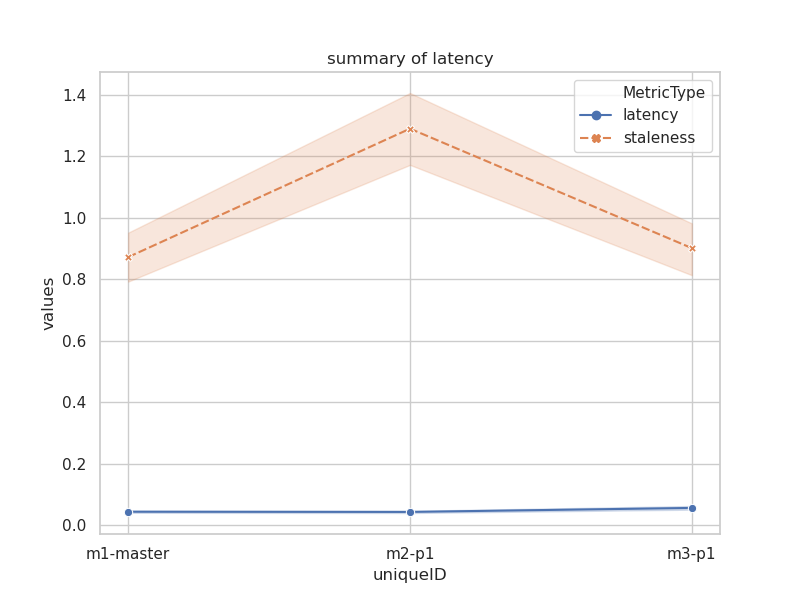

In [20]:
# reference: https://seaborn.pydata.org/generated/seaborn.violinplot.html

import seaborn as sns
sns.set(style="whitegrid")


plt.figure()
#g = sns.lineplot(x="Machine", y="values", hue="Algo", style="Algo",markers=True, data=DF_LAT).set(title="summary of latency") # height should be three times width)
g = sns.lineplot(x="uniqueID", y="values", hue="MetricType", style="MetricType", markers=True, data=DF).set(title="summary of latency") # height should be three times width)
plt.show()


<IPython.core.display.Javascript object>


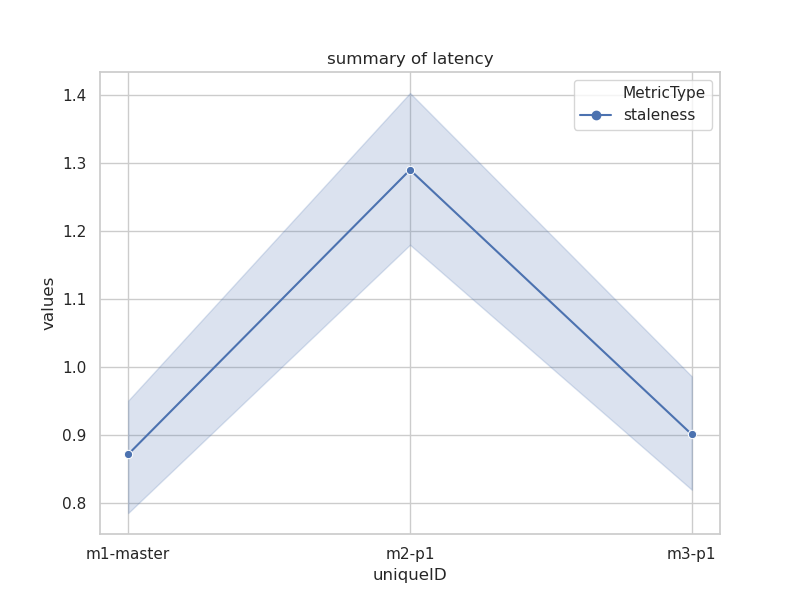

In [21]:
plt.figure()
#g = sns.lineplot(x="Machine", y="values", hue="Algo", style="Algo",markers=True, data=DF_LAT).set(title="summary of latency") # height should be three times width)
g = sns.lineplot(x="uniqueID", y="values", hue="MetricType", style="MetricType", markers=True, data=DF[DF["MetricType"]=="staleness"]).set(title="summary of latency") # height should be three times width)
plt.show()

<IPython.core.display.Javascript object>


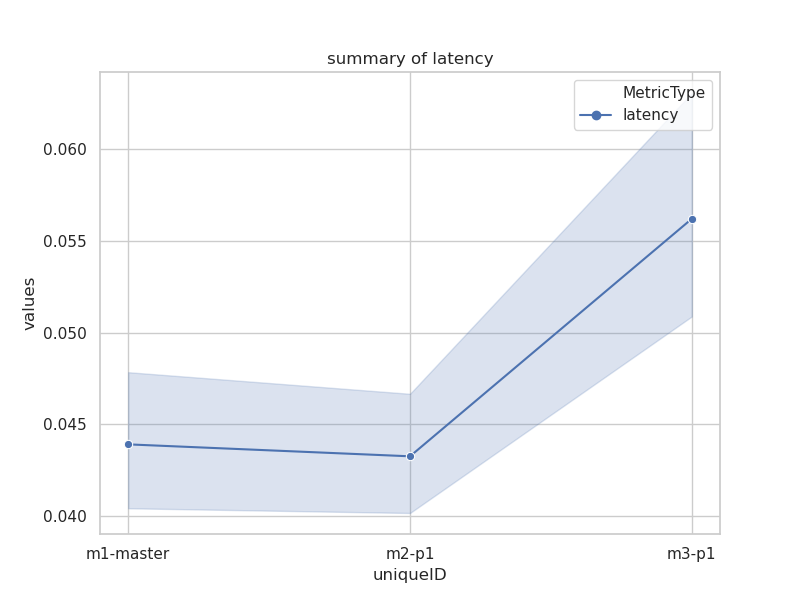

In [22]:
plt.figure()
#g = sns.lineplot(x="Machine", y="values", hue="Algo", style="Algo",markers=True, data=DF_LAT).set(title="summary of latency") # height should be three times width)
g = sns.lineplot(x="uniqueID", y="values", hue="MetricType", style="MetricType", markers=True, data=DF[DF["MetricType"]=="latency"]).set(title="summary of latency") # height should be three times width)
plt.show()